<a href="https://colab.research.google.com/github/MasterVishvesh/Absenteeism_Data/blob/main/new_Predict_Employee_Absenteeism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# pd.set_option('display.max_columns', None)
df=pd.read_csv('/content/Absenteeism_at_work.csv', delimiter=';')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [ ]:
df['Absenteeism time in hours'].describe()

,Absenteeism time in hours
count,740.000000
mean,6.924324
std,13.330998
min,0.000000
25%,2.000000
50%,3.000000
75%,8.000000
max,120.000000


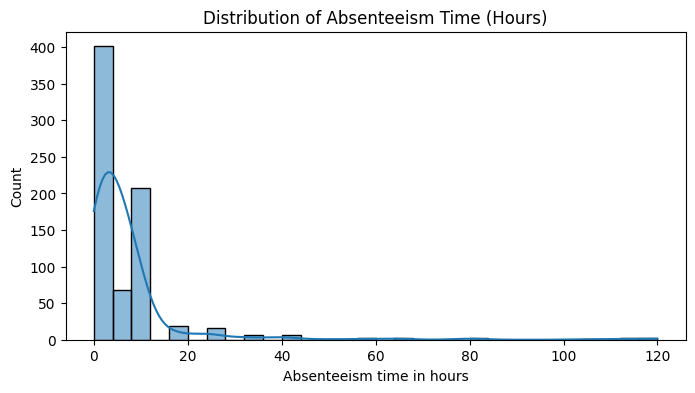

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['Absenteeism time in hours'], bins=30, kde=True)
plt.title('Distribution of Absenteeism Time (Hours)')
plt.show()

# graph show right skewness

In [ ]:
def absenteeism_category(hours):
    if hours <= 7:
        return 'Low'
    elif hours <= 16:
        return 'Medium'
    else:
        return 'High'

df['Absenteeism_Level'] = df['Absenteeism time in hours'].apply(absenteeism_category)



In [ ]:
df['Absenteeism_Level'].value_counts()
df


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism_Level
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,Low
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,Low
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,Low
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,Low
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,1,2,1,0,1,90,172,30,8,Medium
736,1,11,7,3,1,235,11,14,37,264.604,...,3,1,0,0,1,88,172,29,4,Low
737,4,0,0,3,1,118,14,13,40,271.219,...,1,1,1,0,8,98,170,34,0,Low
738,8,0,0,4,2,231,35,14,39,271.219,...,1,2,1,0,2,100,170,35,0,Low


In [ ]:
df = df.drop(columns=['Absenteeism time in hours', 'ID', 'Weight','Height'])


In [ ]:
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism_Level
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,Low
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,Low
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,Low
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,Low
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,30,Medium
736,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,29,Low
737,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,34,Low
738,0,0,4,2,231,35,14,39,271.219,95,0,1,2,1,0,2,35,Low


In [ ]:
df.isnull().sum()

,0
Reason for absence,0
Month of absence,0
Day of the week,0
Seasons,0
Transportation expense,0
Distance from Residence to Work,0
Service time,0
Age,0
Work load Average/day,0
Hit target,0


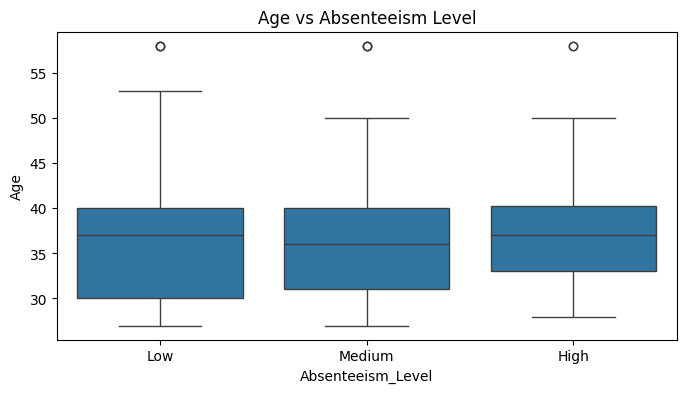

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Absenteeism_Level', y='Age', data=df)
plt.title('Age vs Absenteeism Level')
plt.show()



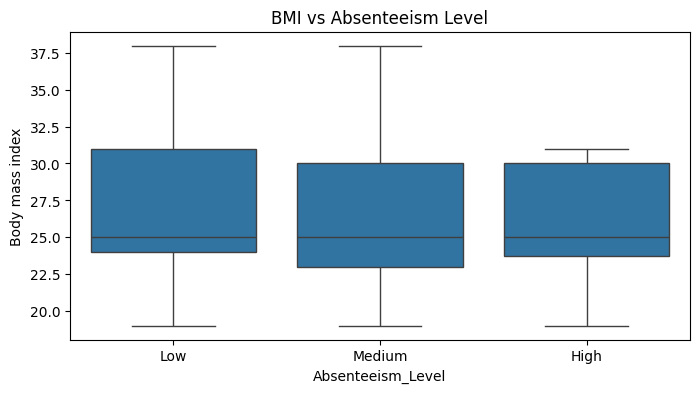

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Absenteeism_Level', y='Body mass index', data=df)
plt.title('BMI vs Absenteeism Level')
plt.show()



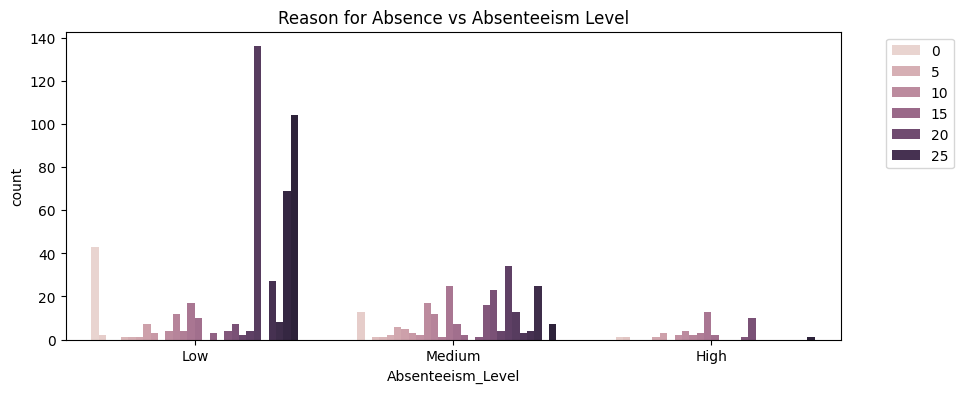

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Absenteeism_Level', hue='Reason for absence', data=df)
plt.title('Reason for Absence vs Absenteeism Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# defin the reason for absence with respect to absenteeism level and fequance of each levels


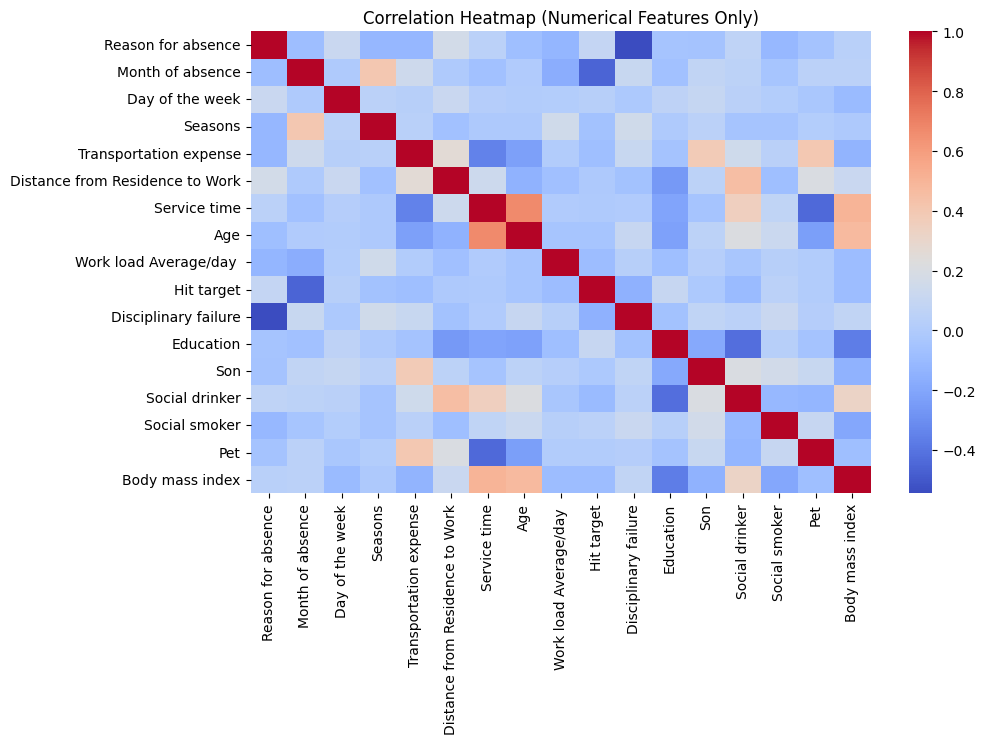

In [ ]:
# Linner relationship between numbrical vales

numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features Only)')
plt.show()


In [ ]:
X = df.drop(columns=['Absenteeism_Level'])
y = df['Absenteeism_Level']


In [ ]:
X.dtypes


,0
Reason for absence,int64
Month of absence,int64
Day of the week,int64
Seasons,int64
Transportation expense,int64
Distance from Residence to Work,int64
Service time,int64
Age,int64
Work load Average/day,float64
Hit target,int64


In [ ]:
categorical_cols = [
    'Reason for absence',
    'Month of absence',
    'Day of the week',
    'Seasons',
    'Education',
    'Social drinker',
    'Social smoker',
    'Disciplinary failure'
]

numerical_cols = [col for col in X.columns if col not in categorical_cols]


In [ ]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


In [ ]:

# Scaling Numerical Features
# Applying Standard Scaling
# We scale numerical features using StandardScaler, which converts values to:
# Mean = 0
# Standard deviation = 1

In [ ]:
scaler = StandardScaler()
X_encoded[numerical_cols] = scaler.fit_transform(X_encoded[numerical_cols])


In [ ]:
X_encoded.shape, y.shape


((740, 61), (740,))

In [ ]:
# Mental Checkpoint (Very Important)
# At this moment:
# The data is numeric
# The target is categorical
# The features are scaled and encoded
# The dataset is model-ready
# This is the end of preprocessing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
log_reg = LogisticRegression(
    max_iter=1000,
    multi_class='multinomial'
)

log_reg.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
# Making Predictions

y_pred = log_reg.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.43      0.33      0.38         9
         Low       0.83      0.91      0.87        94
      Medium       0.65      0.53      0.59        45

    accuracy                           0.76       148
   macro avg       0.63      0.59      0.61       148
weighted avg       0.75      0.76      0.75       148



In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [ ]:
# making predication
y_pred_rf = rf_model.predict(X_test)


In [ ]:
# Evalating
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

        High       0.25      0.11      0.15         9
         Low       0.80      0.91      0.85        94
      Medium       0.61      0.49      0.54        45

    accuracy                           0.74       148
   macro avg       0.55      0.50      0.52       148
weighted avg       0.71      0.74      0.72       148



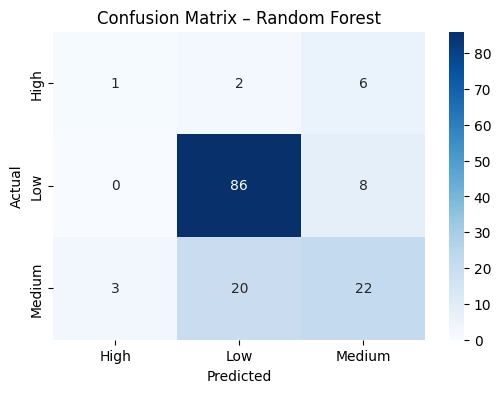

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.show()


In [ ]:
importances = rf_model.feature_importances_
features = X_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


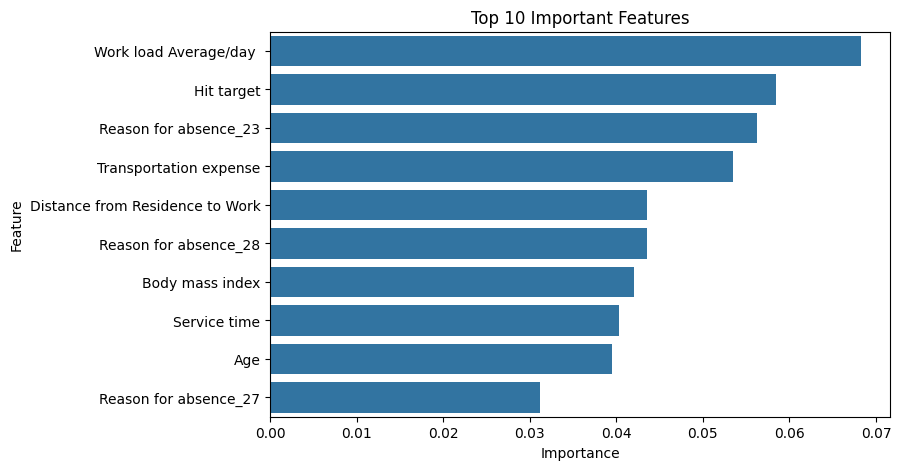

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(10)
)
plt.title('Top 10 Important Features')
plt.show()


# Task
Based on the analyses already performed in the notebook, explain Logistic Regression as a classification model, elaborate on the metrics found in a classification report (precision, recall, f1-score, support), suggest alternative classification models, and compare the choices, explaining when to use Logistic Regression versus other models.

## Explain Logistic Regression

### Subtask:
Provide a detailed explanation of what Logistic Regression is, how it works, and its underlying principles as a classification algorithm.


```markdown
## Explanation of Logistic Regression

Logistic Regression is a fundamental machine learning algorithm used for **classification tasks**, despite its name suggesting 'regression'. It is a linear model that predicts the probability of a categorical dependent variable.

### How it Works:

1.  **Linear Combination**: Similar to linear regression, Logistic Regression first calculates a linear combination of its input features (X) and their corresponding weights (coefficients).
    
    `z = b0 + b1*x1 + b2*x2 + ... + bn*xn`
    
    Where `z` is the linear output, `b0` is the intercept, and `b1` to `bn` are the coefficients for features `x1` to `xn`.

2.  **Sigmoid Function**: The key differentiator is that this linear output `z` is then passed through a **logistic (sigmoid) function**. The sigmoid function `σ(z) = 1 / (1 + e^(-z))` maps any real-valued number into a value between 0 and 1.
    
    `P(Y=1|X) = σ(z)`
    
    This output, `P(Y=1|X)`, represents the **probability** that the dependent variable `Y` belongs to a particular class (e.g., absenteeism level 'High') given the input features `X`.

3.  **Classification**: These probabilities are then used to classify data points. For a binary classification problem, a threshold (often 0.5) is applied:
    *   If `P(Y=1|X) >= 0.5`, the data point is classified into Class 1.
    *   If `P(Y=1|X) < 0.5`, the data point is classified into Class 0.
    
    In this notebook, for multi-class classification (like 'Low', 'Medium', 'High' absenteeism levels), Logistic Regression extends this concept using strategies such as **One-vs-Rest (OvR)** or by directly implementing **Multinomial Logistic Regression**. OvR trains a separate binary classifier for each class, treating that class as positive and all others as negative.

4.  **Decision Boundary**: The threshold applied to the probabilities defines a **decision boundary**. This boundary is a hyperplane (a line in 2D, a plane in 3D) that separates the different classes in the feature space. Data points falling on one side of the boundary are assigned to one class, and those on the other side to another.

5.  **Cost Function**: During the training process, Logistic Regression aims to find the optimal coefficients (`b0, b1, ... bn`) that minimize a **cost function**. For classification, this is typically the **cross-entropy loss (or log loss)**. This function measures the difference between the predicted probabilities and the actual class labels, penalizing incorrect and uncertain predictions. The model uses an optimization algorithm (like gradient descent) to iteratively adjust the coefficients to minimize this cost, thereby improving its ability to make accurate predictions.

In essence, Logistic Regression models the probability of an event occurring, making it a powerful and interpretable classification algorithm, even for multi-class problems like the one tackled in this notebook.

## Explain Classification Report Metrics

### Subtask:
Elaborate on the metrics commonly found in a classification report, such as precision, recall, f1-score, and support, and explain their significance in evaluating model performance.


## Explain Classification Report Metrics

A classification report provides a comprehensive overview of a classification model's performance by presenting key metrics for each class, as well as aggregated averages.

### Metrics Explained:

*   **Precision**: Precision measures the proportion of positive identifications that were actually correct. It answers the question: "Of all the instances predicted as positive, how many were actually positive?" A high precision indicates a low rate of false positives. It is particularly significant when the cost of false positives is high. For example, in a spam detection system, high precision means fewer legitimate emails are incorrectly marked as spam.

*   **Recall (Sensitivity)**: Recall measures the proportion of actual positives that were identified correctly. It answers the question: "Of all the actual positive instances, how many did the model correctly identify?" A high recall indicates a low rate of false negatives. It is crucial when the cost of false negatives is high. For instance, in medical diagnosis, high recall means fewer actual disease cases are missed.

*   **F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. It is calculated as `2 * (Precision * Recall) / (Precision + Recall)`. The F1-score is particularly useful when there is an uneven class distribution (imbalanced datasets) because it penalizes models that favor the majority class. It is also preferred when a balance between precision and recall is desired, as a high F1-score means the model has both low false positives and low false negatives.

*   **Support**: Support simply indicates the number of actual occurrences of each class in the specified dataset (e.g., in the test set). It is not a performance metric itself but provides context for the other metrics. A low support value for a class might mean that the precision, recall, and f1-score for that class are less reliable or more volatile, as they are based on a smaller number of samples.

### Aggregated Averages:

*   **Accuracy**: Accuracy measures the overall proportion of correctly predicted instances out of the total number of instances. It is calculated as `(True Positives + True Negatives) / Total Instances`. While intuitive, accuracy can be misleading in imbalanced datasets, where a model might achieve high accuracy by simply predicting the majority class.

*   **Macro Avg**: Macro average calculates the unweighted mean of a metric (precision, recall, F1-score) for each class. This means it treats all classes equally, regardless of their support. It is useful when you want to give equal importance to all classes, even if some are underrepresented.

*   **Weighted Avg**: Weighted average calculates the mean of a metric for each class, weighted by their support (the number of true instances for each class). This means classes with more samples contribute more to the average. It is useful when you want to account for class imbalance and reflect the overall performance in relation to the frequency of each class.

## Suggest Alternative Classification Models

### Subtask:
Suggest other popular classification models that can be used as alternatives to Logistic Regression.


```markdown
## Alternative Classification Models to Logistic Regression

While Logistic Regression is a good baseline model, several other popular classification models can be used as alternatives, often offering improved performance or different characteristics suited for specific problems.

Here are some suggestions:

### 1. Decision Trees
*   **Description:** Decision Trees work by splitting the data into subsets based on the value of input features. This process is repeated in a recursive manner, creating a tree-like structure of decisions. Each internal node represents a test on an attribute, each branch represents an outcome of the test, and each leaf node represents a class label.
*   **When to use:** Decision Trees are highly interpretable and can capture non-linear relationships. They are suitable when you need a model that is easy to understand and explain, and when the relationships between features and the target are not strictly linear.

### 2. Support Vector Machines (SVM)
*   **Description:** SVMs are powerful classification models that work by finding an optimal hyperplane that best separates data points into different classes in a high-dimensional space. They can use various kernel functions (e.g., linear, polynomial, radial basis function) to handle non-linear decision boundaries.
*   **When to use:** SVMs are particularly effective in high-dimensional spaces and when the number of dimensions is greater than the number of samples. They are robust to overfitting and work well with clear margins of separation, making them a good choice for complex classification tasks where linearity is not assumed.

### 3. Gradient Boosting Machines (e.g., XGBoost, LightGBM)
*   **Description:** Gradient Boosting is a powerful ensemble technique that builds models sequentially. Each new model attempts to correct the errors of the previous ones. XGBoost and LightGBM are optimized implementations that are known for their speed and accuracy. They combine many weak prediction models (typically decision trees) to create a strong predictor.
*   **When to use:** These models are excellent for achieving high predictive accuracy on complex datasets, especially when dealing with tabular data. They are highly effective in capturing intricate non-linear relationships and interactions between features. They are often the go-to choice in Kaggle competitions and other high-performance scenarios.

### 4. Random Forests (already used in the notebook)
*   **Description:** As already demonstrated, Random Forests are an ensemble learning method that builds multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It addresses the overfitting problem of individual decision trees by averaging their predictions.
*   **When to use:** Random Forests are a significant improvement over single decision trees. They are robust to overfitting, handle high-dimensional data well, and can implicitly perform feature selection. They are a good choice when you need a highly accurate and robust model that can handle complex data with many features and potential interactions, and they provide good generalization performance.
```

## Compare Model Choices

### Subtask:
Discuss the scenarios and reasons why one might choose Logistic Regression over other models, and conversely, why other models might be preferred over Logistic Regression.


### Comparing Logistic Regression with Other Models

When choosing a classification model, it's crucial to understand the strengths and weaknesses of different algorithms in various scenarios. Here, we compare Logistic Regression with other common models like Random Forests.

#### Advantages of Logistic Regression:

1.  **Interpretability:** Logistic Regression is highly interpretable. The coefficients assigned to each feature directly indicate the direction and magnitude of their influence on the log-odds of the target variable. This makes it easy to understand which features are important and how they affect the outcome.
2.  **Simplicity and Efficiency:** It is a relatively simple algorithm, both computationally and conceptually. It trains quickly, especially on large datasets, and requires less computational power compared to more complex models.
3.  **Baseline Model:** Due to its simplicity and speed, Logistic Regression often serves as an excellent baseline model. It provides a quick and reliable initial performance metric against which more complex models can be compared.
4.  **When Linearity Holds:** Logistic Regression performs well when there is a linear relationship between the independent variables and the log-odds of the dependent variable. If the underlying data generating process is close to linear, it can be very effective.
5.  **Probability Estimates:** It directly outputs probability scores, which can be useful for ranking predictions or setting custom thresholds for classification.

#### When Other Models Might Be Preferred:

While Logistic Regression is powerful, it has limitations, especially when dealing with complex data. Other models, such as Random Forests, often excel in these scenarios:

1.  **Complex Non-linear Relationships:** Logistic Regression assumes linearity in the log-odds. If the relationship between features and the target is highly non-linear or involves intricate interactions, models like Random Forests, Decision Trees, Gradient Boosting Machines, or Support Vector Machines (SVMs) can capture these complexities more effectively.
2.  **Higher Accuracy Requirements:** In situations where maximizing prediction accuracy is paramount, and interpretability can be somewhat traded off, ensemble methods (like Random Forests and Gradient Boosting) often outperform Logistic Regression. They reduce bias and variance, leading to better generalization.
3.  **Handling Feature Interactions:** Random Forests inherently handle complex interactions between features without explicit engineering. Logistic Regression would require manual creation of interaction terms, which can be cumbersome.
4.  **Robustness to Outliers:** Tree-based models are generally more robust to outliers and noisy data compared to Logistic Regression, which can be sensitive to extreme values.
5.  **Automatic Feature Selection (Implicitly):** Tree-based models can implicitly perform feature selection by prioritizing more informative features in their splits.
6.  **Large and High-Dimensional Datasets:** While Logistic Regression can handle large datasets efficiently, ensemble models can also scale well and often provide superior performance on high-dimensional data by identifying relevant patterns.

#### Key Considerations for Choice:

*   **Interpretability vs. Accuracy:** If understanding *why* a prediction is made is crucial (e.g., in medical diagnoses or credit scoring explanations), Logistic Regression is often preferred. If only the *what* (the prediction itself) matters, and accuracy is key, more complex models might be better.
*   **Data Characteristics:** Consider the linearity of relationships, presence of interactions, and potential for outliers.
*   **Computational Resources and Time:** Simpler models like Logistic Regression are faster to train and deploy.
*   **Scalability:** All models have different scaling properties with increasing data size and dimensionality.
*   **Baseline Performance:** Always start with a simpler model to establish a baseline before moving to more complex ones.

## Final Task

### Subtask:
Summarize the explanations provided on Logistic Regression, classification report metrics, and the comparison of classification models.


## Summary:

### Q&A

*   **What is Logistic Regression as a classification model?**
    Logistic Regression is a linear model for classification that uses a logistic (sigmoid) function to map linear combinations of features to probabilities between 0 and 1. These probabilities are then used to classify data points based on a threshold (e.g., 0.5). It can be extended for multi-class problems using strategies like One-vs-Rest (OvR) and minimizes cross-entropy loss during training to find optimal coefficients.
*   **What are the key metrics in a classification report (precision, recall, f1-score, support)?**
    *   **Precision:** Proportion of positive identifications that were actually correct, crucial when false positive costs are high.
    *   **Recall (Sensitivity):** Proportion of actual positives identified correctly, important when false negative costs are high.
    *   **F1-Score:** Harmonic mean of precision and recall, balancing both and useful for imbalanced datasets.
    *   **Support:** The number of actual occurrences for each class, providing context for other metrics.
    *   **Aggregated Averages:** Accuracy (overall correct predictions, can be misleading for imbalanced data), Macro Avg (unweighted mean across classes), and Weighted Avg (mean weighted by class support).
*   **What are alternative classification models to Logistic Regression?**
    Alternative models include Decision Trees (interpretable, non-linear), Support Vector Machines (SVMs) (high-dimensional data, robust to overfitting), Gradient Boosting Machines (e.g., XGBoost, LightGBM) (high accuracy, complex non-linear relationships), and Random Forests (ensemble method, robust to overfitting, good for high-dimensional data).
*   **How do Logistic Regression and other models compare, and when should each be used?**
    Logistic Regression is preferred for its interpretability, simplicity, efficiency, and as a baseline, especially when linear relationships between features and log-odds hold. Other models (like ensemble methods or SVMs) are preferred for complex non-linear relationships, higher accuracy requirements, handling feature interactions, and robustness to outliers. Model choice often involves a trade-off between interpretability and accuracy, considering data characteristics, computational resources, and the need for a strong baseline.

### Data Analysis Key Findings

*   Logistic Regression effectively models the probability of an event using a sigmoid function, making it suitable for classification tasks by establishing a decision boundary and minimizing cross-entropy loss.
*   Classification report metrics provide a nuanced view of model performance beyond accuracy: Precision focuses on minimizing false positives, Recall on minimizing false negatives, and F1-Score balances both, particularly valuable for imbalanced datasets, with Support indicating class frequency.
*   A diverse set of alternative classification models exists, including Decision Trees (interpretable, non-linear), Support Vector Machines (effective for high-dimensional spaces), and ensemble methods like Gradient Boosting Machines (high accuracy, complex data) and Random Forests (robust, good generalization), each suited for different data characteristics and performance goals.
*   Model selection hinges on factors like desired interpretability versus accuracy, the linearity and complexity of data relationships, the presence of feature interactions, and computational constraints, positioning Logistic Regression as a strong baseline or interpretable choice and other models for more complex or high-accuracy scenarios.

### Insights or Next Steps

*   The detailed explanations provided lay a strong theoretical foundation for understanding the chosen model and its evaluation. The next step could involve applying these concepts to the specific absenteeism dataset, interpreting the classification report of the previously trained Logistic Regression model, and potentially exploring how the alternative models perform on the same data.
*   Given the comprehensive comparison, a practical next step would be to train and evaluate a few of the suggested alternative models (e.g., a Random Forest or XGBoost) on the absenteeism data. This would allow for a direct performance comparison against the Logistic Regression baseline, guiding towards the most suitable model for this specific problem.
